In [113]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys
import numpy as np
import matplotlib
import matplotlib.dates
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

import pandas as pd

filename = 'data/refresh.csv'

df = pd.read_csv(filename,sep='\t')
df['date'] = pd.to_datetime(df['date'],infer_datetime_format=True)
df.set_index(['date'],inplace=True)
df.loc[df['rows'] == 0,'rows'] = np.nan

In [114]:
deployments = df['deployment'].values
deployments

array(['bampfa-internal', 'bampfa-internal', 'bampfa-internal', ...,
       'ucjeps-public', 'ucjeps-public', 'ucjeps-public'], dtype=object)

bampfa-internal


<Figure size 432x288 with 0 Axes>

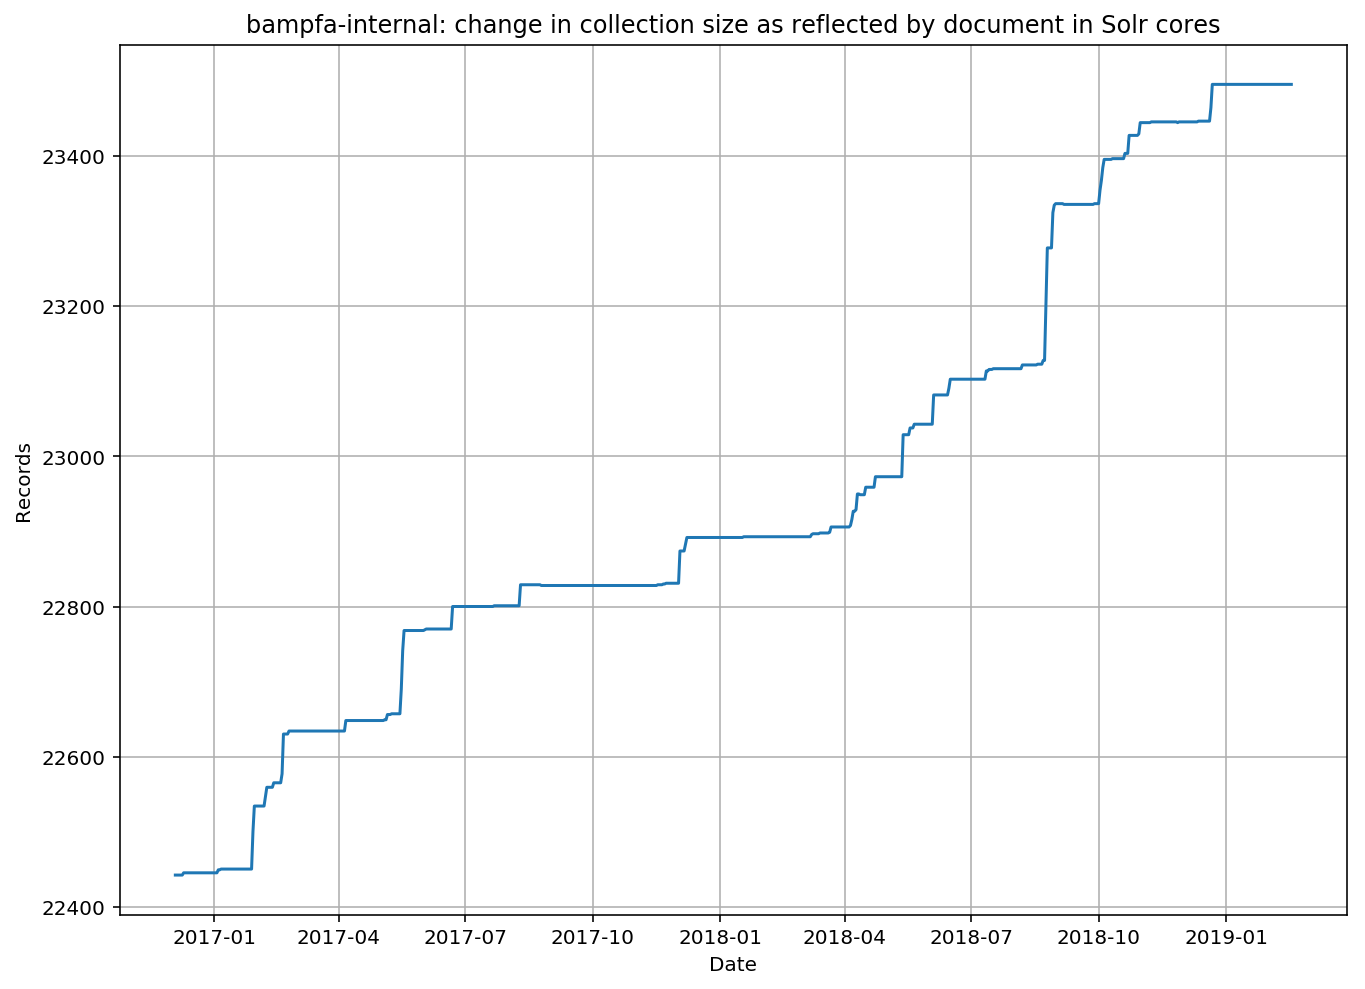

bampfa-public


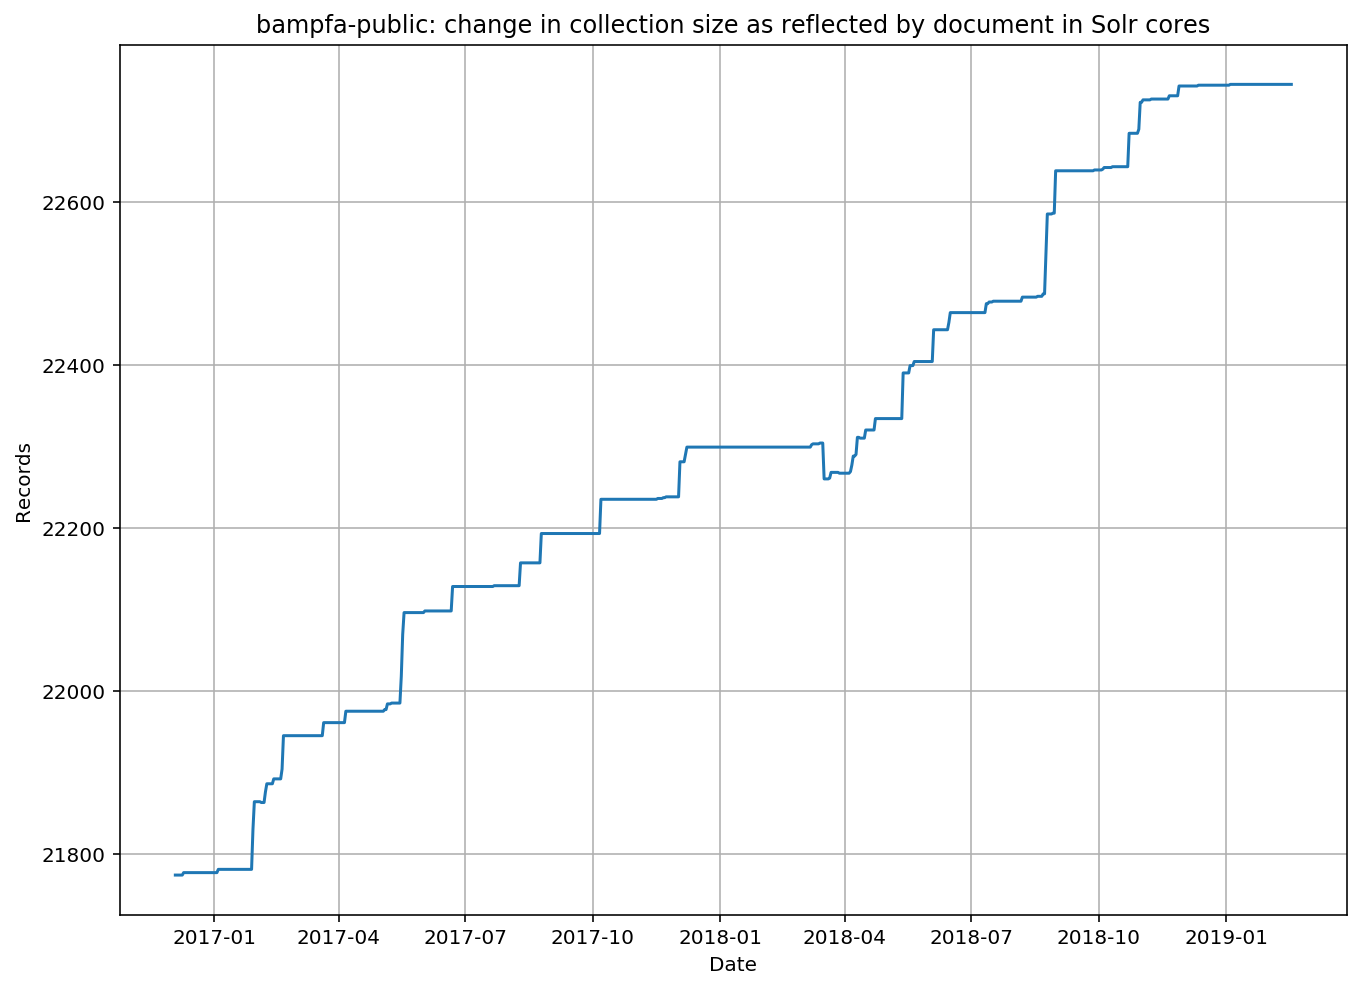

botgarden-internal


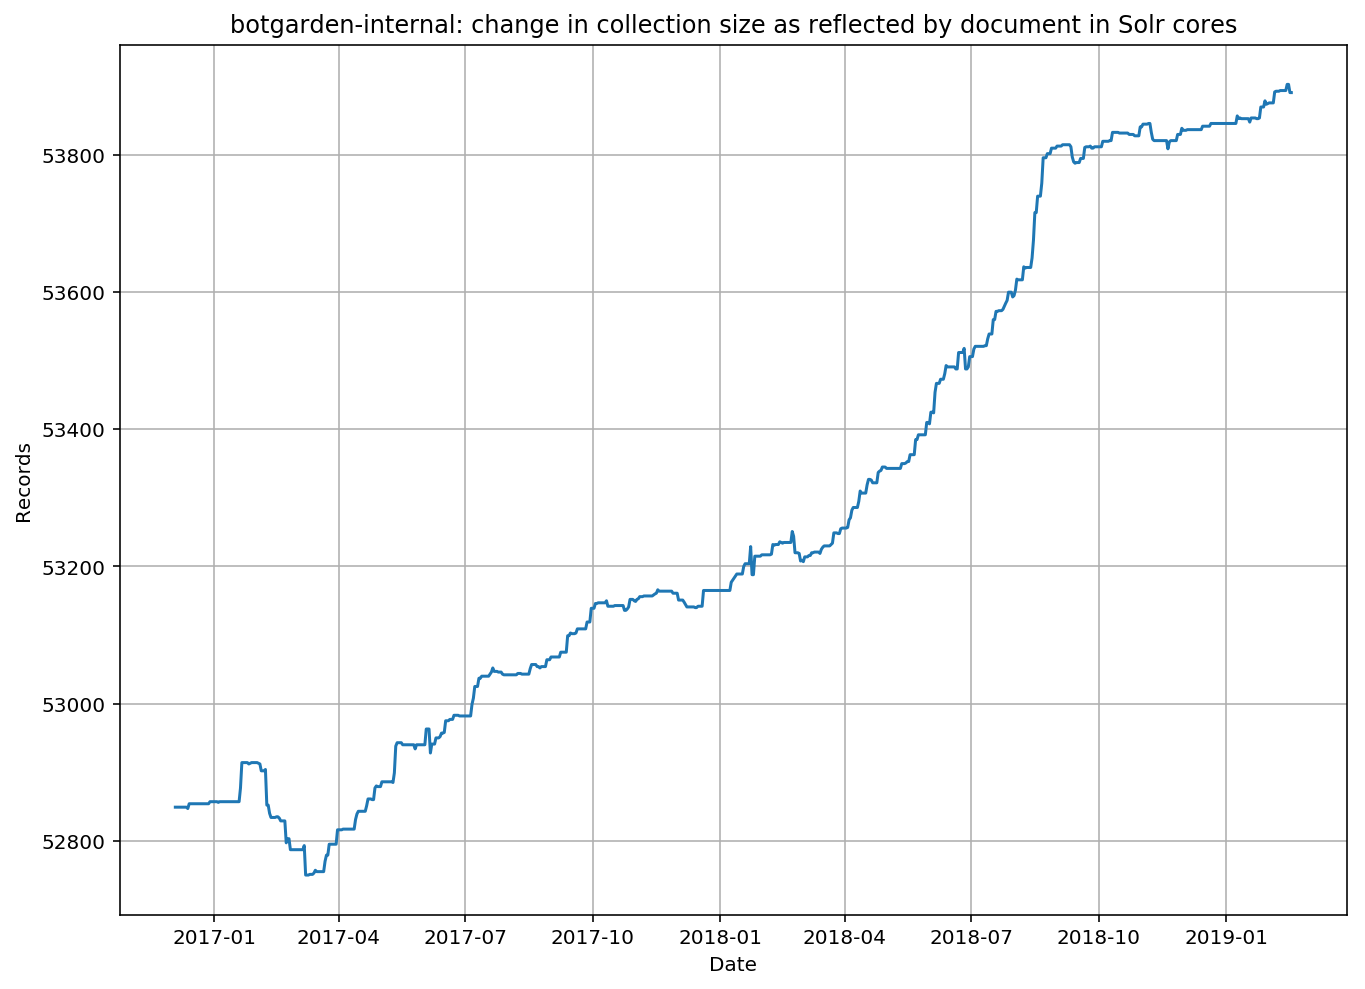

botgarden-propagations


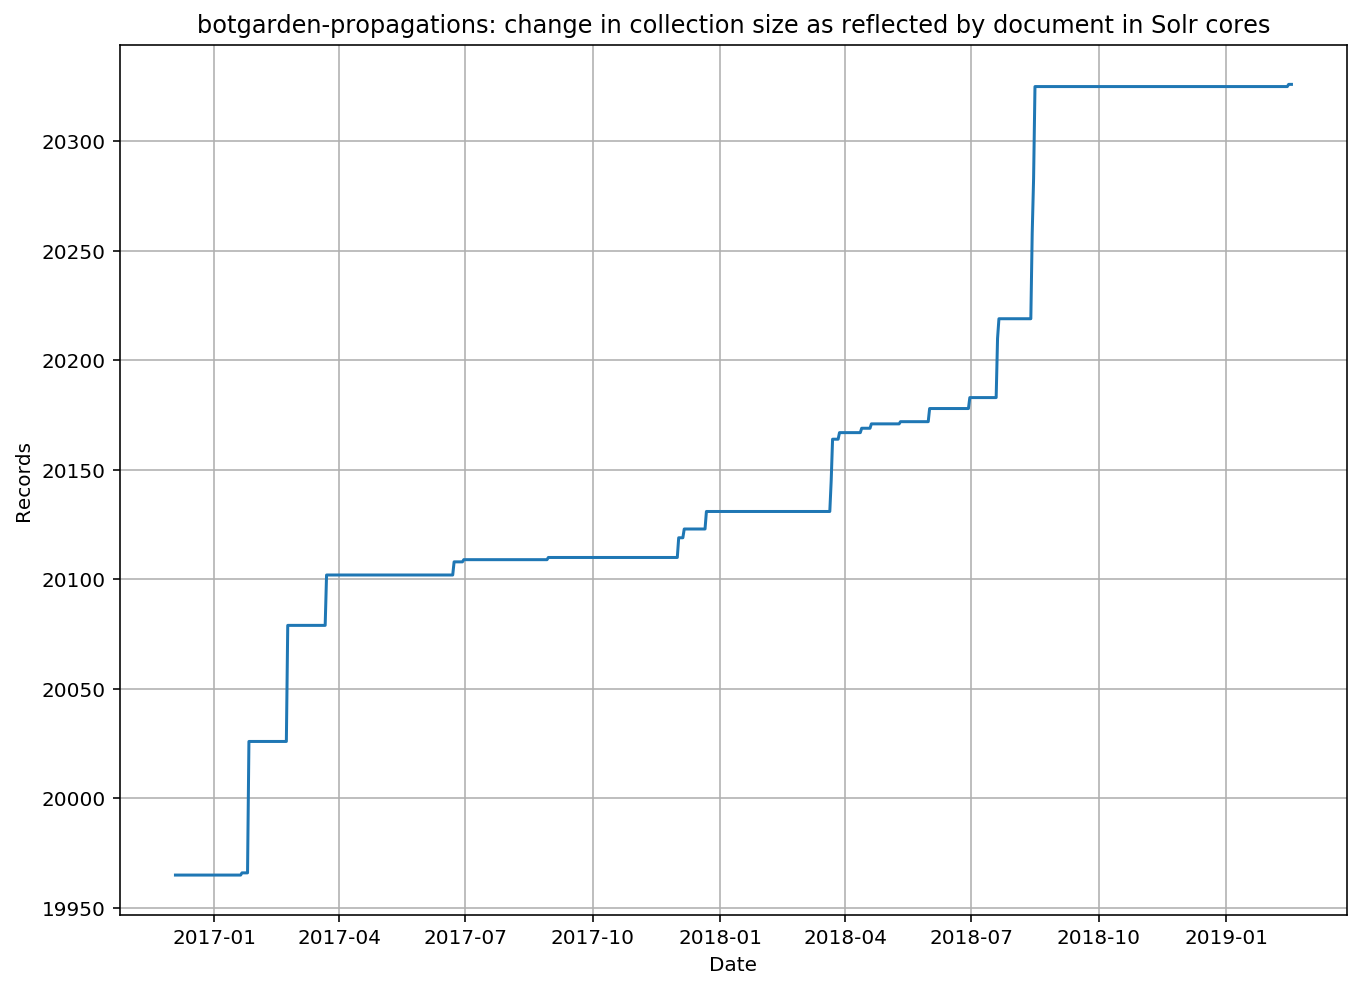

botgarden-public


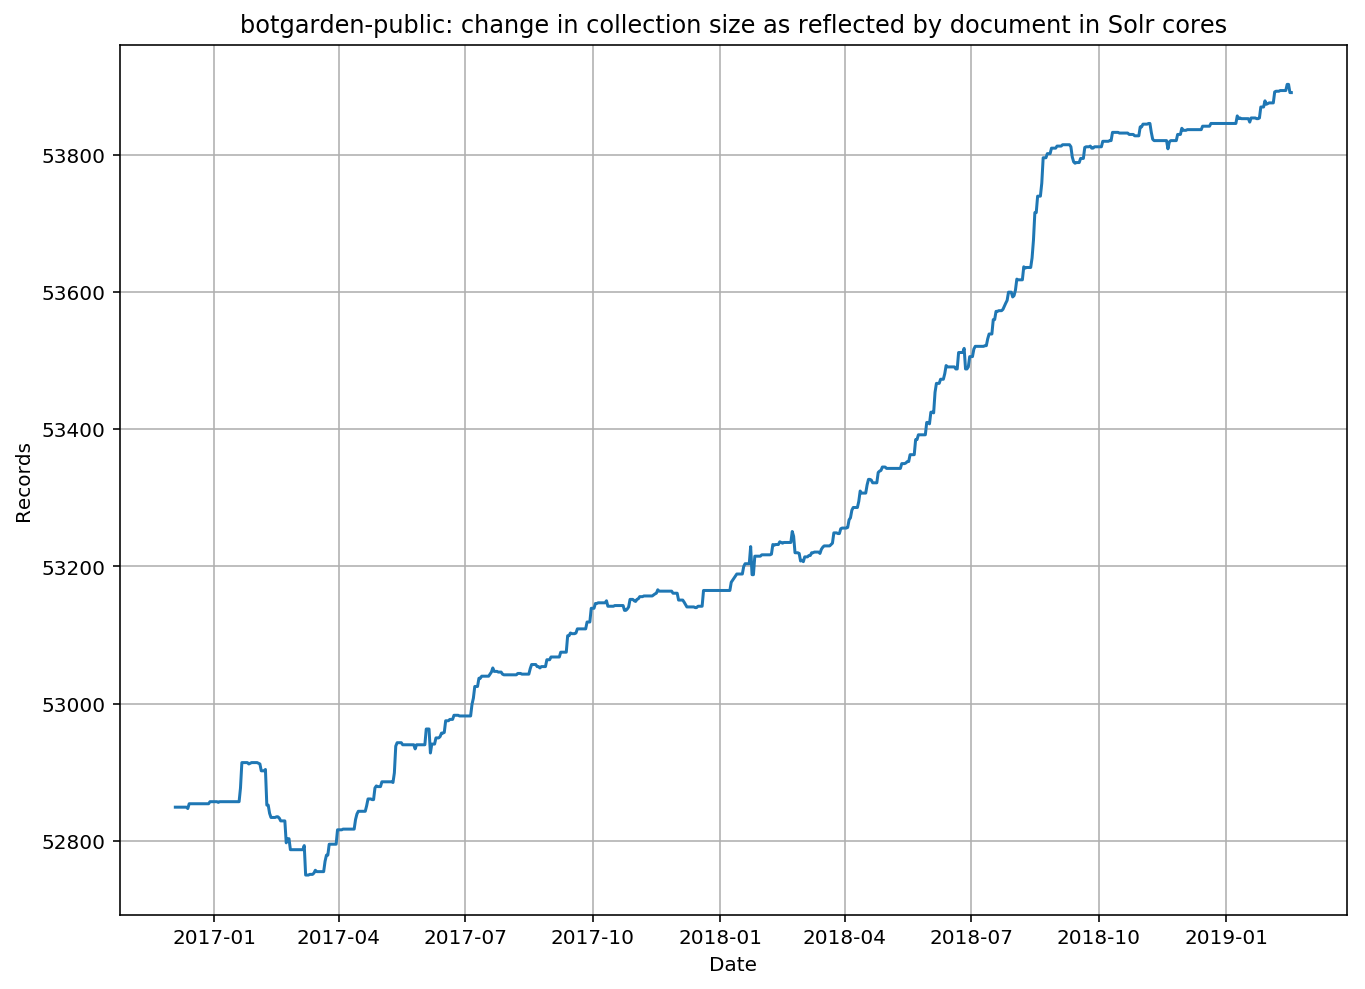

cinefiles-public


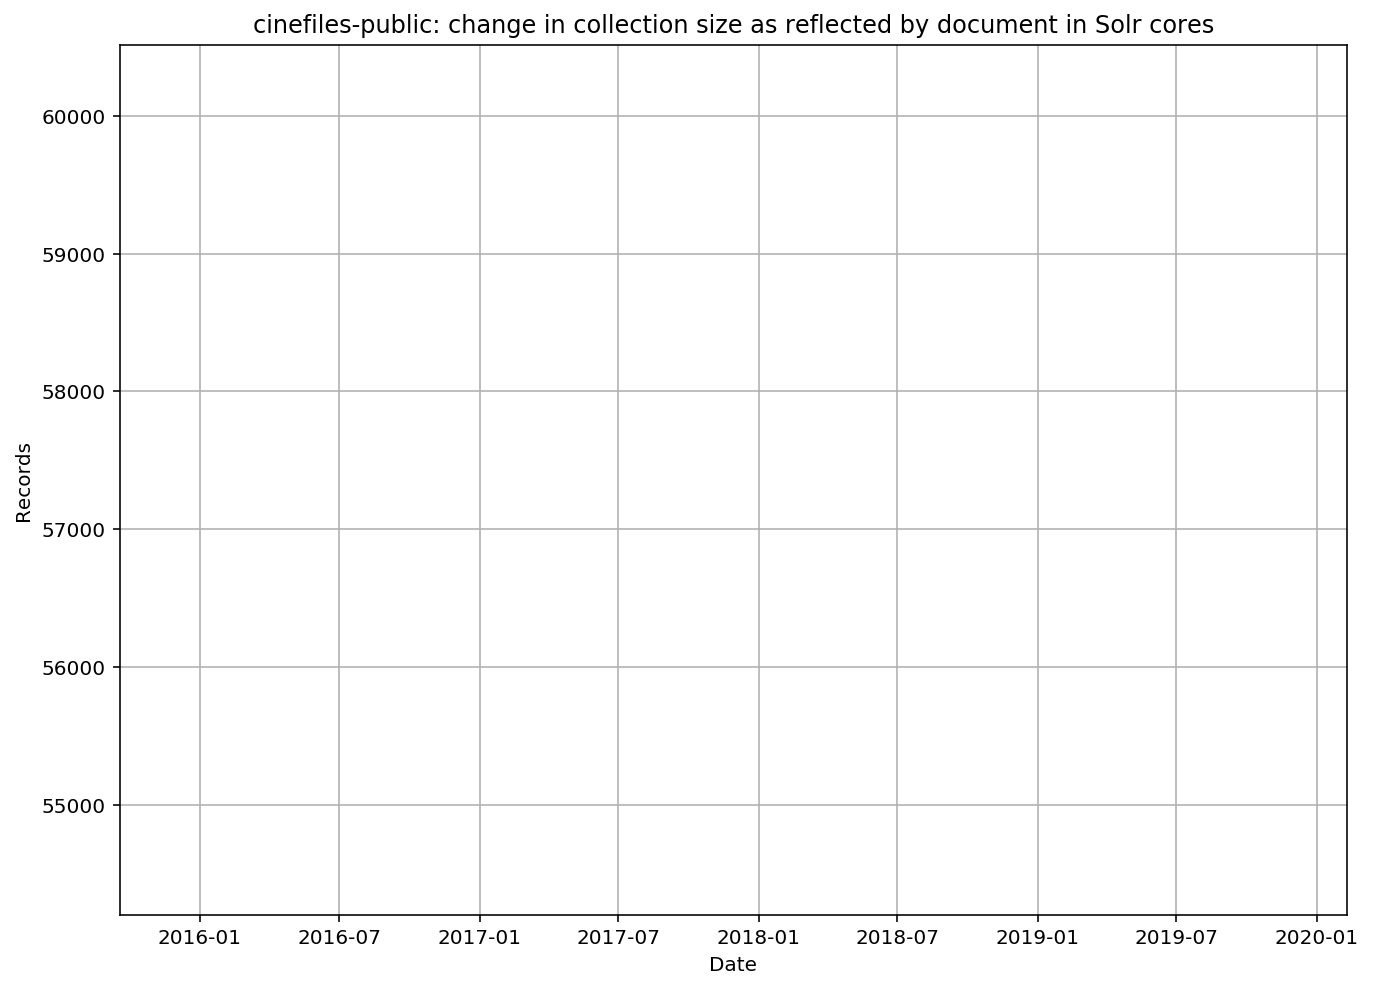

pahma-internal


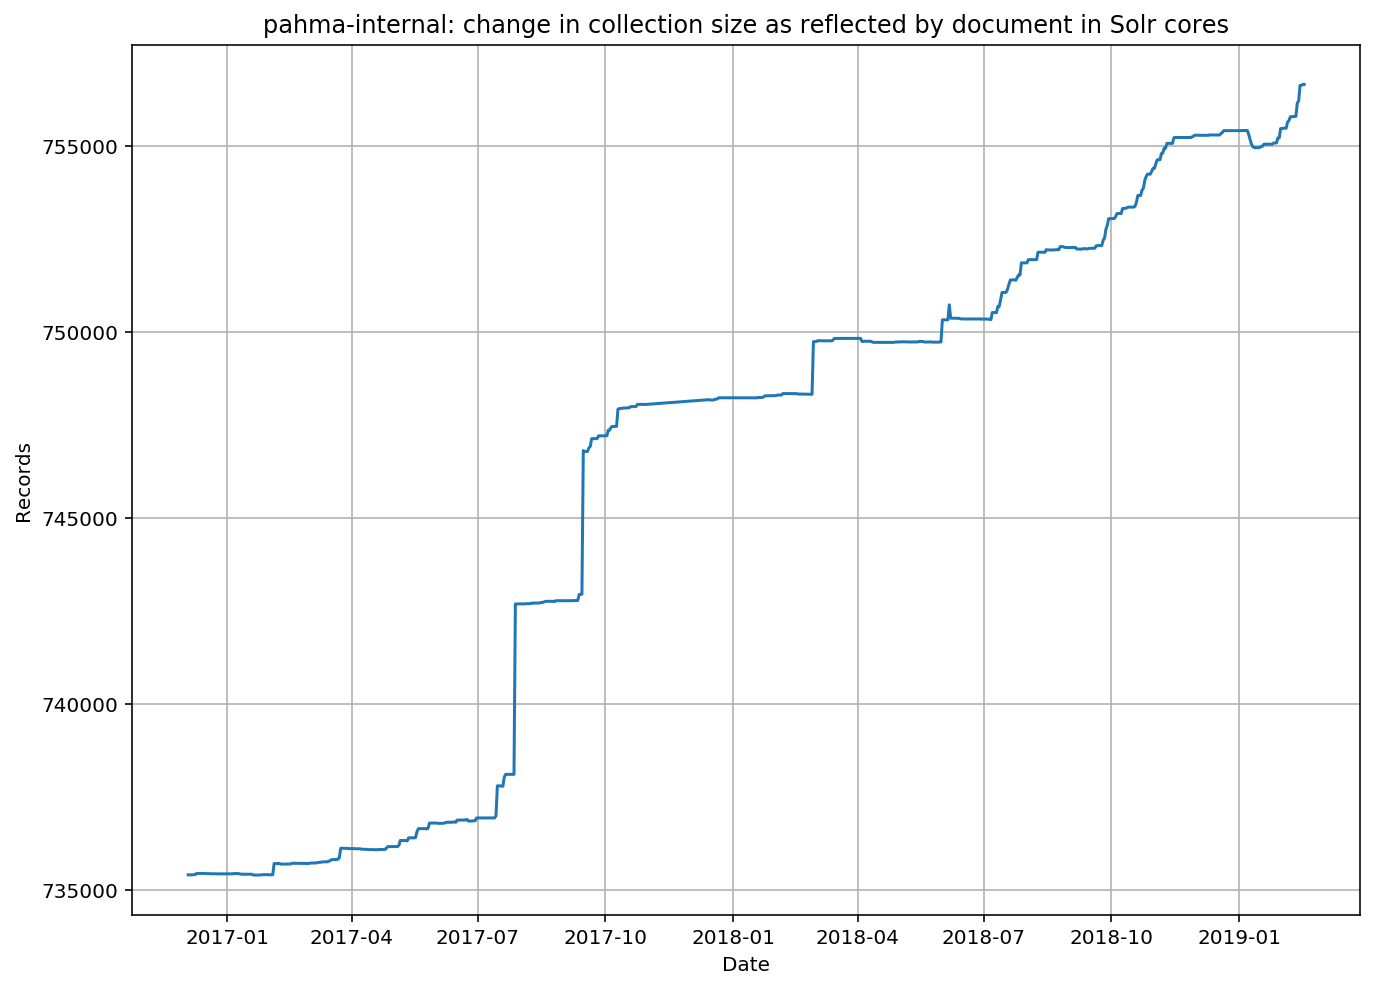

pahma-locations


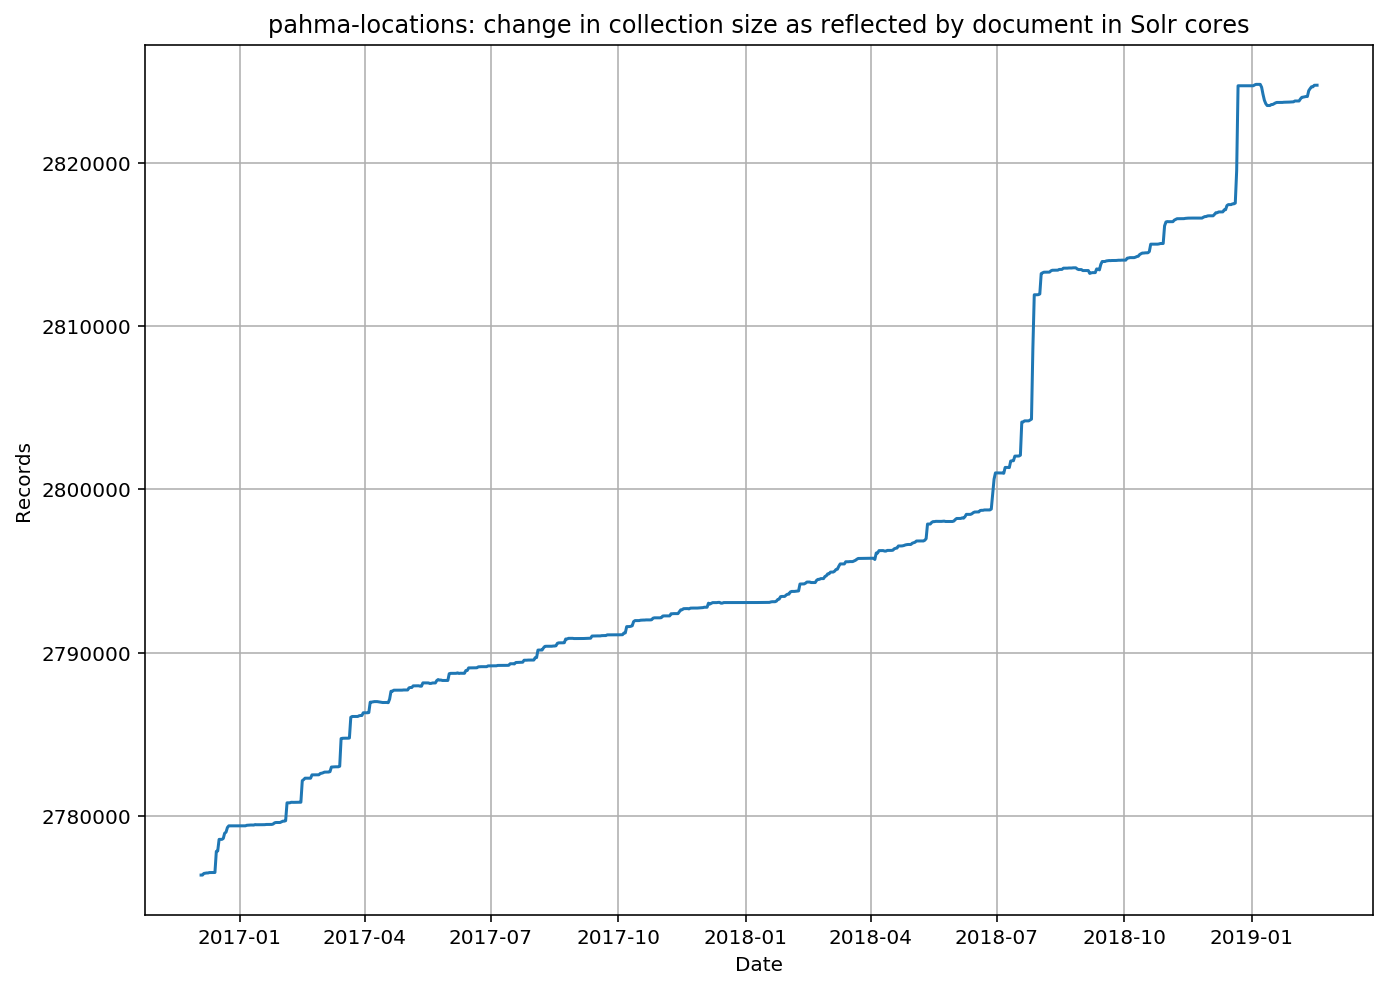

pahma-osteology


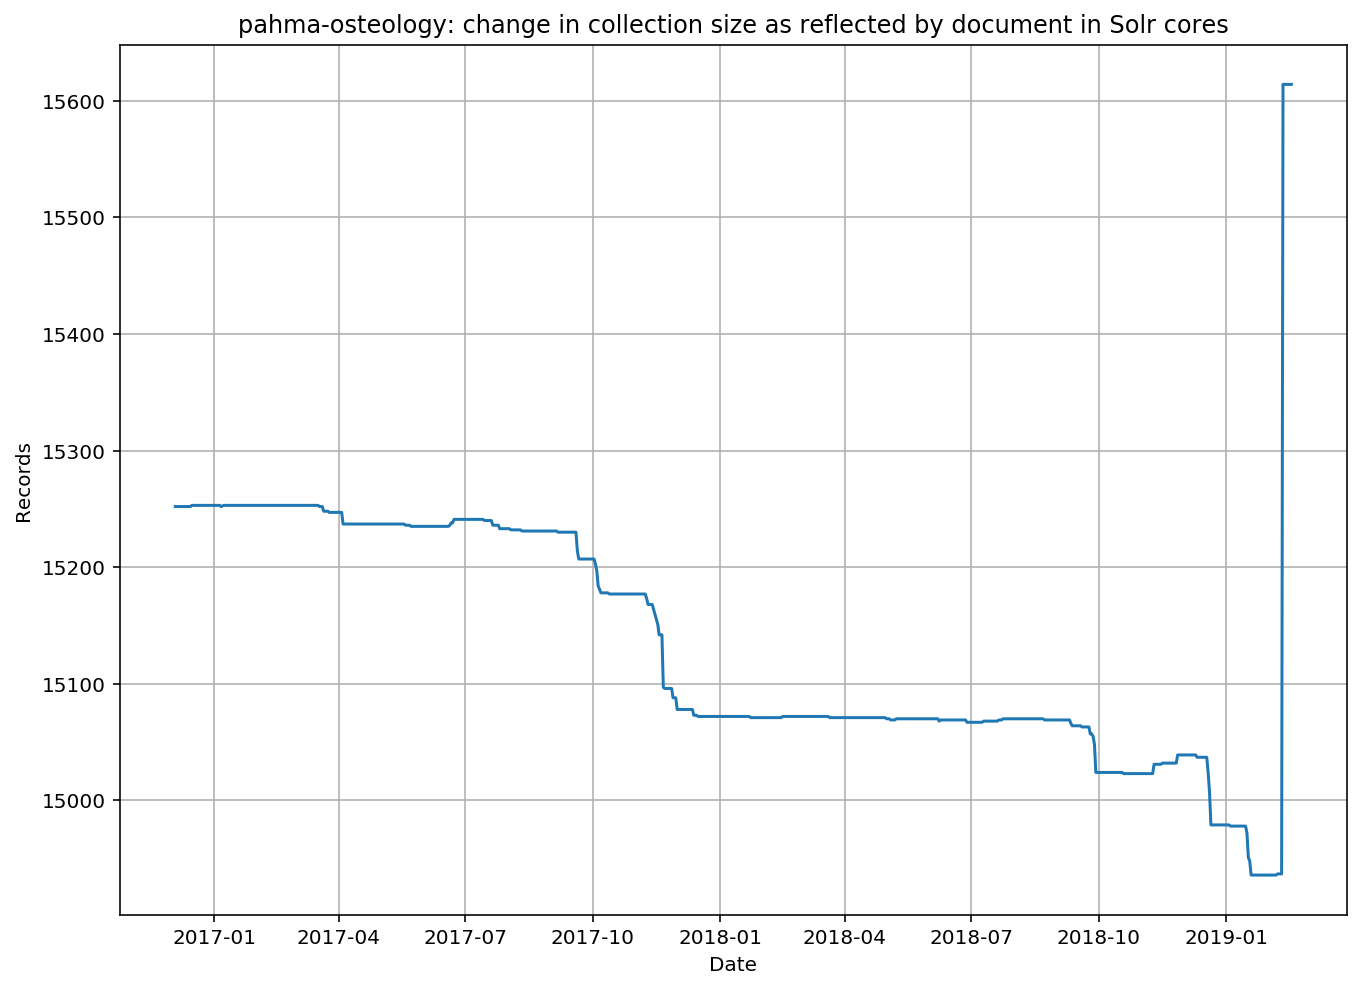

pahma-public


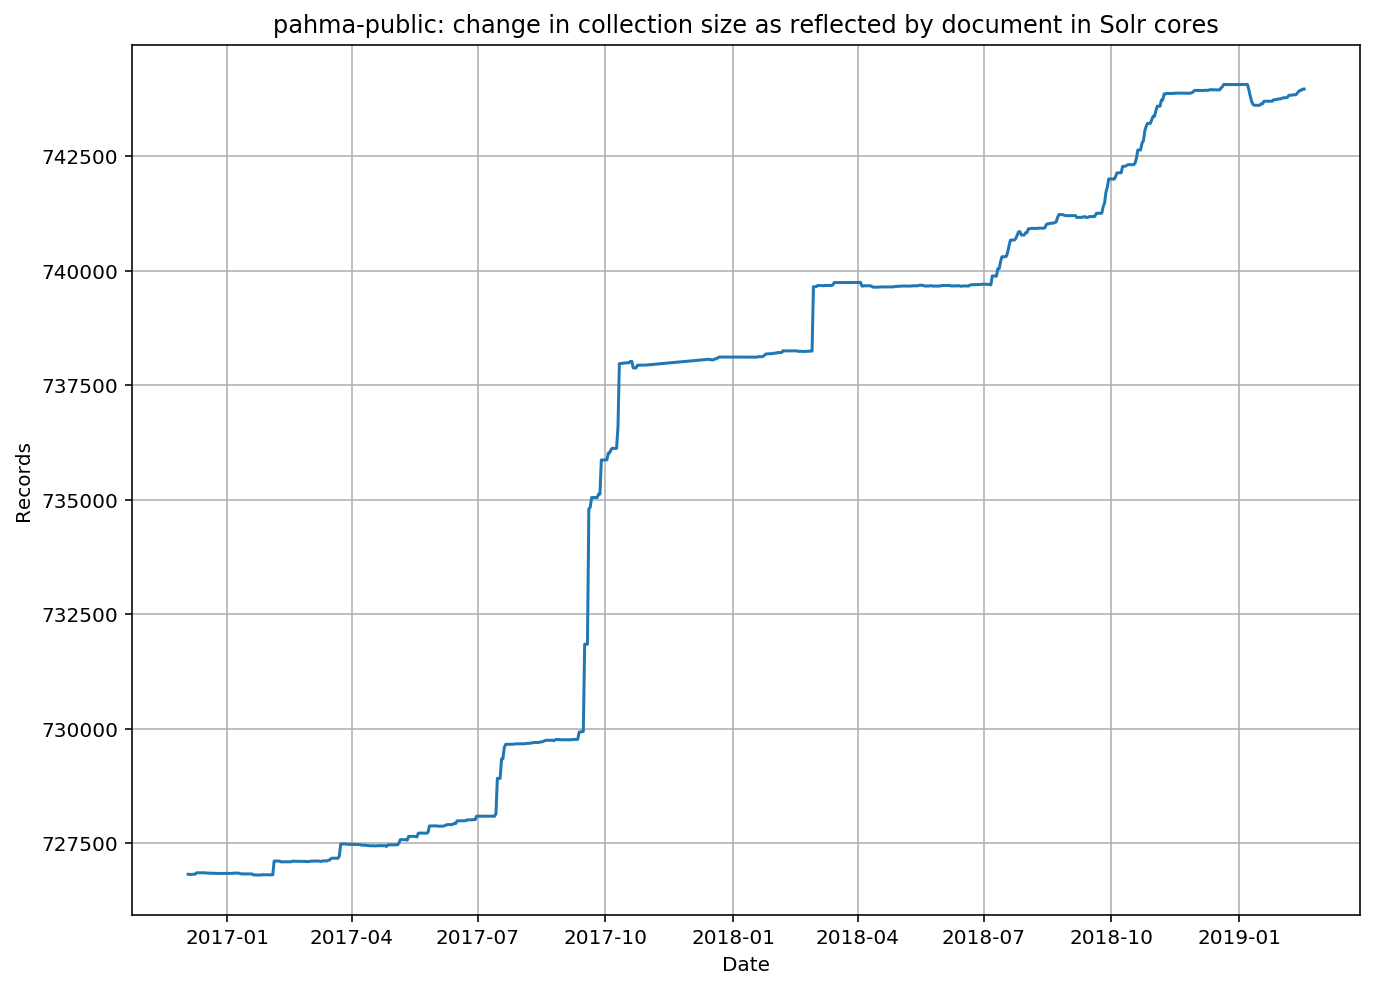

ucjeps-media


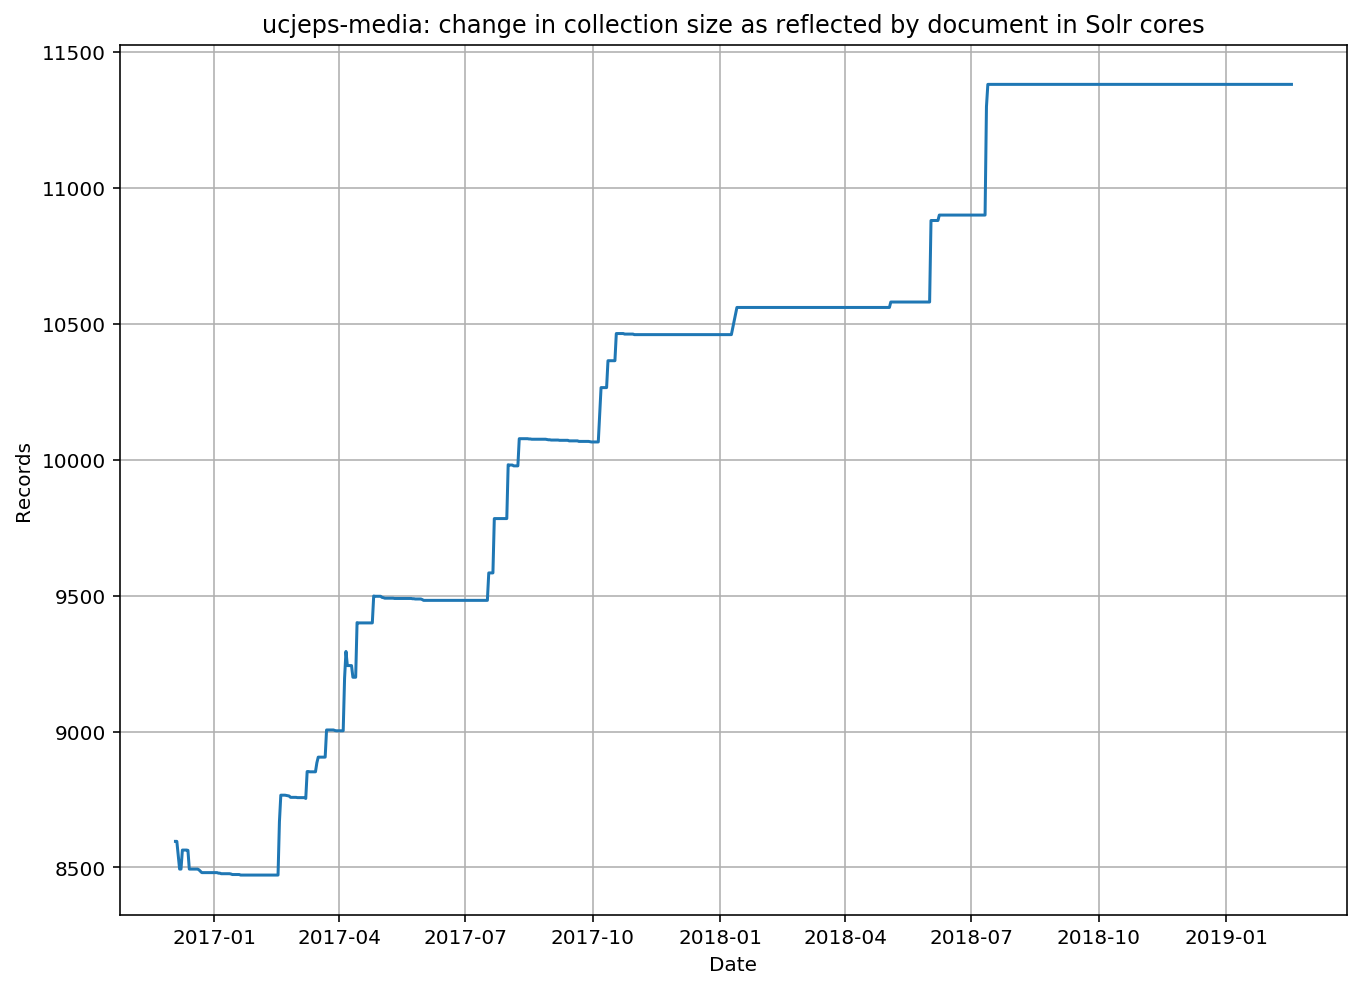

ucjeps-public


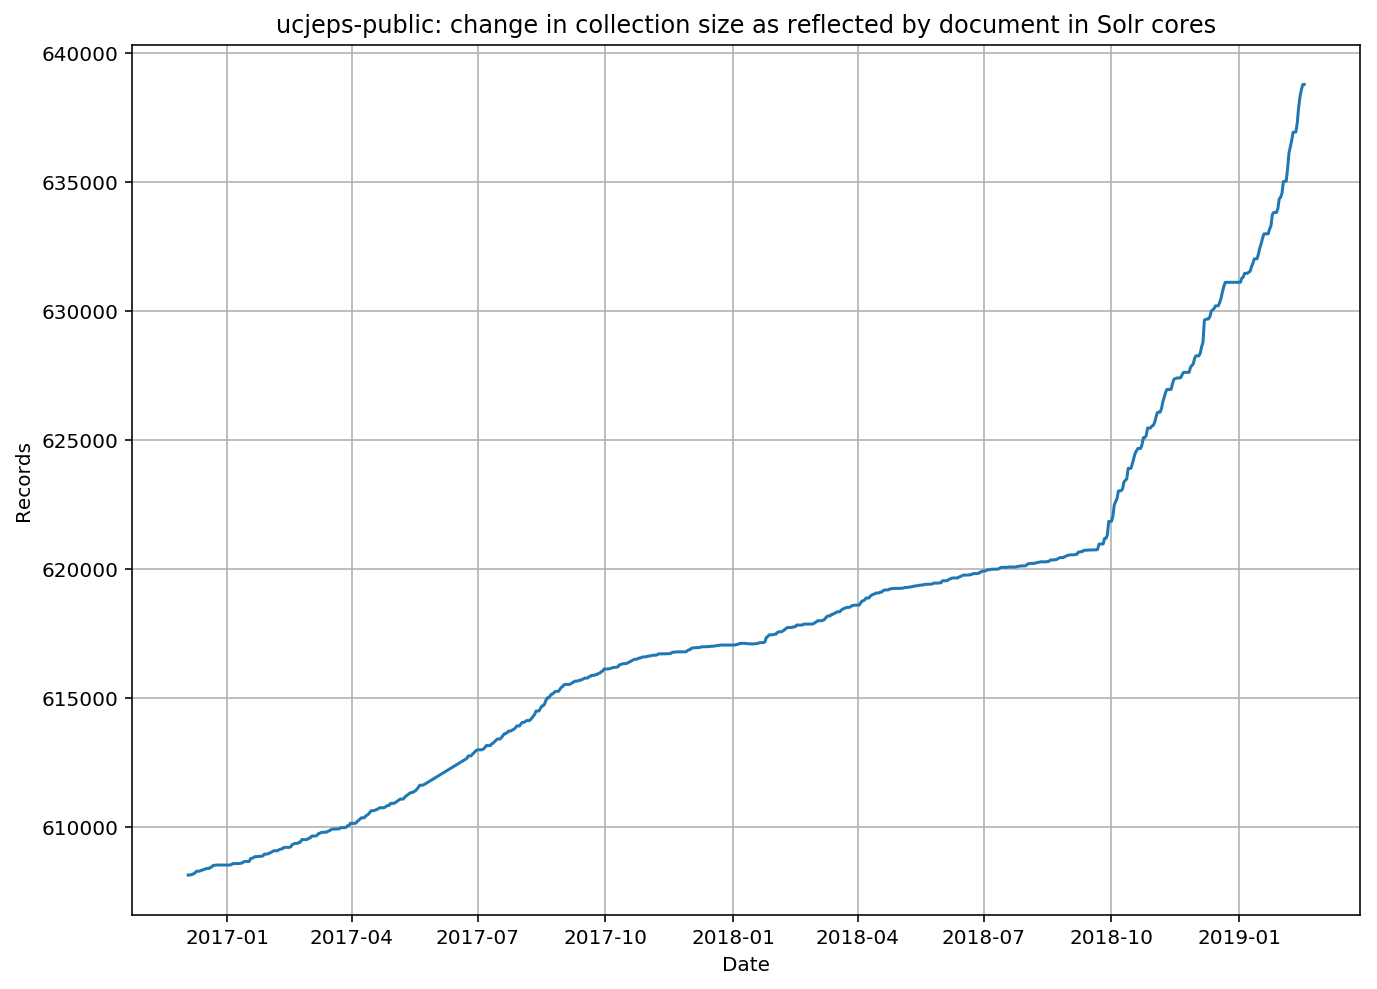

In [121]:
plt.clf()
for key,group_df in df.groupby('deployment'):
    print(key)
    #group_df.plot()
    plt.figure(figsize=(11,8))
    #plt.rcParams["figure.figsize"] = (8, 6) # (w, h)
    plt.plot(group_df.index, group_df.rows)
    #plt.plot(data['deployment'], data['date'], 'r,')
    plt.grid(True)
    plt.title("{}: change in collection size as reflected by document in Solr cores".format(key))
    plt.xlabel("Date")
    plt.ylabel("Records")
    
    plt.savefig('data/{}-solrdocs'.format(key))
    plt.show()